<a href="https://colab.research.google.com/github/OlegDenisenko/Data-analyst-Step1k/blob/main/6.%20A%D0%BDa%D0%BBu%D1%82u%D0%BA_%D0%B4a%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%BF_St%D0%B5%D1%80uk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Следующий минипроект**

1) 1) Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board:

Date — дата
AveragePrice — средняя цена одного авокадо

Total Volume — количество проданных авокадо

4046 — количество проданных авокадо PLU* 4046

4225 — количество проданных авокадо PLU 4225

4770 — количество проданных авокадо PLU 4770

Total Bags — всего упаковок

Small Bags — маленькие упаковки

Large Bags — большие

XLarge Bags — очень большие

type — обычный или органический

year — год

Region — город или регион the city or region of the observation

*PLU — код товара (Product Lookup code)

*В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:
avocado_mean = pd.read_csv("path",
                           index_col=0, squeeze=True, parse_dates=['Date'])

                           Date
                           2015-01-04    1.301296
                           2015-01-11    1.370648
                           2015-01-18    1.391111
                           2015-01-25    1.397130
                           2015-02-01    1.247037
                           Name: AveragePrice, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
avocado_mean = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv', parse_dates=['Date'], index_col='Date')#

2) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [ ]:
avocado_mean.head(5)

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [ ]:
round(avocado_mean.AveragePrice.rolling(3).mean().max(),2)

1.85

3) Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.
Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна. 

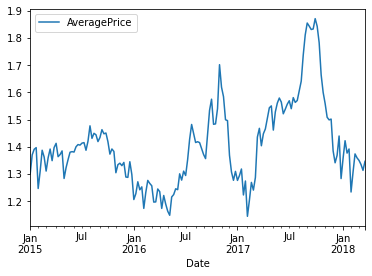

In [ ]:
avocado_mean.plot()

Вариант разового использования

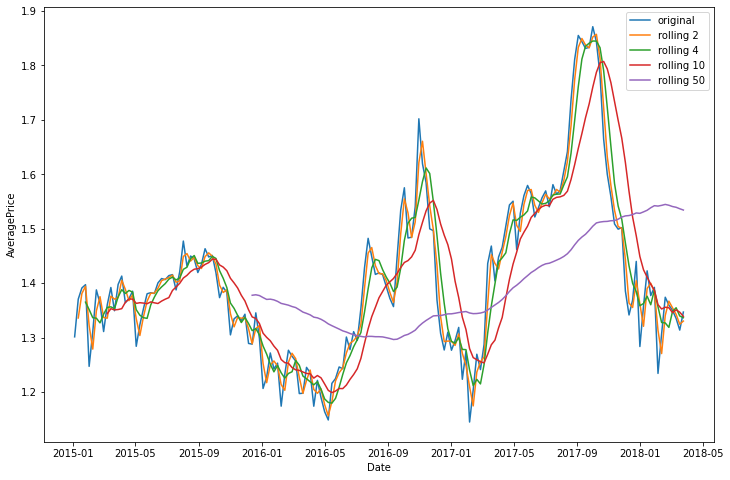

In [ ]:
avocado_mean_2 = avocado_mean.rolling(2).mean()
avocado_mean_4 = avocado_mean.rolling(4).mean()
avocado_mean_10 = avocado_mean.rolling(10).mean()
avocado_mean_50 = avocado_mean.rolling(50).mean()

plt.figure(figsize=(12,8))
sns.lineplot(x= avocado_mean.index, y= avocado_mean.AveragePrice, label = 'original')
sns.lineplot(x= avocado_mean_2.index, y= avocado_mean_2.AveragePrice, label = 'rolling 2')
sns.lineplot(x= avocado_mean_4.index, y= avocado_mean_4.AveragePrice, label = 'rolling 4')
sns.lineplot(x= avocado_mean_10.index, y= avocado_mean_10.AveragePrice, label = 'rolling 10')
sns.lineplot(x= avocado_mean_50.index, y= avocado_mean_50.AveragePrice, label = 'rolling 50')

Вариант с циклом для многоразового использования

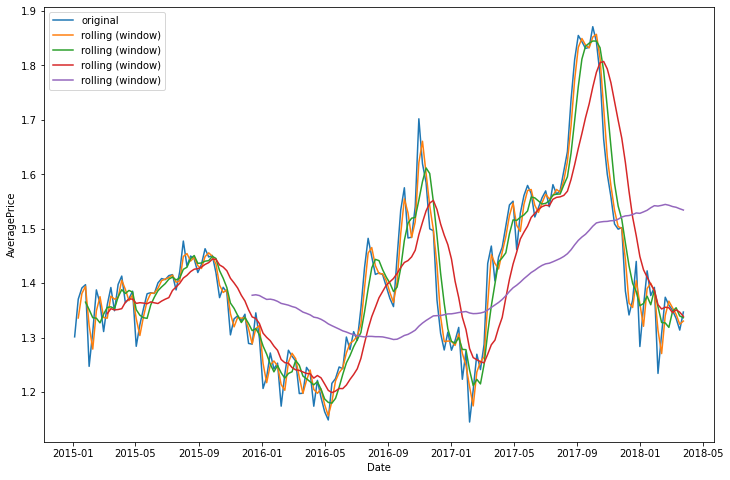

In [ ]:
plt.figure(figsize=(12,8))

windows = [2, 4, 10, 50] 

sns.lineplot(x= avocado_mean.index, y= avocado_mean.AveragePrice, label = 'original')

for window in windows:
  tdf = avocado_mean.rolling(window).mean()
  sns.lineplot(x= tdf.index, y= tdf.AveragePrice, label = f'rolling (window)');

4) ⭐️Задание со звёздочкой!⭐️
Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [ ]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

5) ⭐️Задание со звёздочкой!⭐️
И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, (avocado_full.csv) указав index_col=0 (использовать первую колонку как индекс).
Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [ ]:
avocado = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_full.csv', index_col=0)

In [ ]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [ ]:
organic_chicago = avocado.query('type == "organic" & region == "Chicago"')

In [ ]:
organic_chicago['rolling'] = organic_chicago.AveragePrice.rolling(4).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
organic_chicago['ewm'] = organic_chicago.AveragePrice.ewm(span=2).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


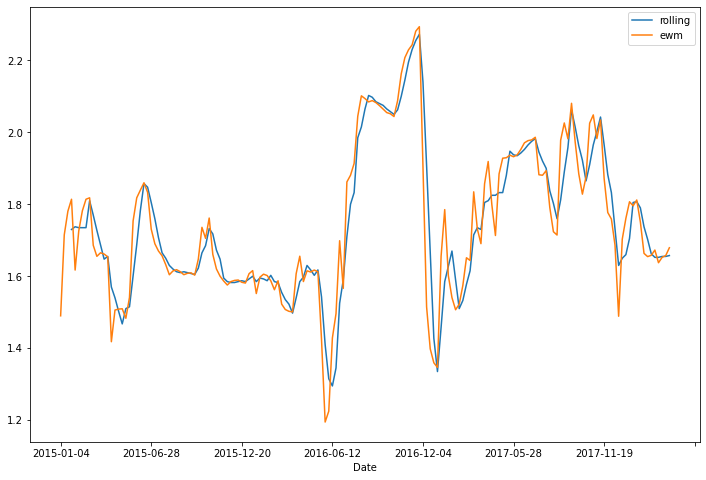

In [ ]:
organic_chicago[['rolling', 'ewm']].plot(figsize=(12,8));

Выбор строк по дате. Нужны только строки 'rolling', 'ewm'.

In [ ]:
organic_chicago.loc['2016-08-21', ['rolling', 'ewm']]

rolling     2.1025
ewm        2.08461
Name: 2016-08-21, dtype: object

Округление нельзя применить сразу для двух значений. Поэтому применяю к каждому в отдельности.

In [ ]:
organic_chicago.loc['2016-08-21', 'rolling'].round(3)

2.102

In [ ]:
organic_chicago.loc['2016-08-21', 'ewm'].round(3)

2.085

6) 💀 Сложное задание! 💀
Далее будем работать с данными по опозданиям в заключении сделок!
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.
Могут понадобиться:
pd.to_timedelta()
pd.Series.str

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/72204/delays.csv')
df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [ ]:
df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))

7) Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical
Могут понадобится:
pd.cut()

In [ ]:
df['delay_categorical'] = pd.cut(df.delay, bins=3)

8) 💀 Сложное задание! 💀

Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были

'less than 1 day' – время от 0 до 1 дня

'1-2 days' – от 1 до 2 дней

'2-3 days' – от 2 до 3 дней

'more than 3 days' – больше 3 дней

In [ ]:
df.delay

0     1 days 14:57:48
1     4 days 02:14:23
2     0 days 06:08:57
3     0 days 23:40:19
4     1 days 13:21:53
            ...      
259   0 days 05:32:08
260   3 days 23:27:14
261   1 days 15:22:34
262   2 days 17:15:02
263   1 days 15:50:29
Name: delay, Length: 264, dtype: timedelta64[ns]

In [ ]:
bins = [pd.to_timedelta('0d'),
        pd.to_timedelta('1d'),
        pd.to_timedelta('2d'),
        pd.to_timedelta('3d'),
        pd.to_timedelta('100d')]

In [ ]:
labels = ['less than 1 day',
          '1-2 days',
          '2-3 days',
          'more than 3 days']

In [ ]:
df.delay_categorical = pd.cut(df.delay, bins=bins, labels=labels)